Import Libraries

In [84]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [85]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [86]:
rows = []
file_path = 'Data/'
file_name = 'DownstairsScan_not_move'
with open(file_path+file_name+'.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [87]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000113
scan_time,0.122276
range_min,0.150000
range_max,12.000000


In [88]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[1::5]))
translation_df = translation_df.T
translation_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,...,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579,-0.7431087260419579
1,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,...,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497,-0.3487675667616497
2,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,...,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127,0.08082633934240127
3,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,...,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283,0.0007169012923446283
4,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,...,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886,0.0019515493431825886
5,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,...,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937,-0.7050467993776937
6,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,...,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663,0.7091577315343663


In [89]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[3::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
1,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.406000018119812,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
2,1.406000018119812,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.406000018119812,1.406000018119812,1.4040000438690186,...,1.406000018119812,1.4040000438690186,1.4040000438690186,1.406000018119812,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186
3,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,...,1.406000018119812,1.4040000438690186,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812
4,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,...,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186,1.406000018119812,1.406000018119812,1.406000018119812,1.4040000438690186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.4019999504089355,1.4019999504089355,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4019999504089355,1.4040000438690186,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4019999504089355,1.4040000438690186,1.4040000438690186
1076,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355
1077,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,...,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355,1.4019999504089355
1078,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,...,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186,1.4040000438690186


In [90]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # Header_info.loc['angle_increment'][i] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081)
# alpha_df = alpha_df.transpose().drop(del_indexes, axis=1).transpose()
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,...,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807,0.005807
1,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,...,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614,0.011614
2,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,...,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421,0.017421
3,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,...,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228,0.023228
4,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,...,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035,0.029035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,...,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311,6.248311
1076,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,...,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118,6.254118
1077,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,...,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925,6.259925
1078,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,...,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732,6.265732


In [91]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

del_indexes = np.array(list(rho_df[0][rho_df[0].astype(float) <= 1.4].index))
del_indexes


array([], dtype=float64)

In [92]:
# Create the cartesasion dataset, combine with the polar, then save into a new dataset
all_data_df = []


for i in range(alpha_df.shape[1]):

    cartesian_df = pd.DataFrame(pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float)), ['X', 'Y'])
    alpha_rho_df = pd.DataFrame(cart2pol(rho_df[i].astype(float), alpha_df[i].astype(float)), ['Rho', 'Alpha'])

    #Finally combine the xy data and alpha rho data
    combined_df = pd.concat([alpha_rho_df, cartesian_df])
    combined_df = combined_df.drop(del_indexes, axis=1)
    combined_df = combined_df.T.reset_index(drop=True)
    all_data_df.append(combined_df)
all_data_df


[           Rho     Alpha         X         Y
 0     1.404012  0.004136  1.403976  0.008153
 1     1.404048  0.008272  1.403905  0.016306
 2     1.406108  0.012390  1.405787  0.024493
 3     1.406192  0.016519  1.405621  0.032656
 4     1.404300  0.020677  1.403408  0.040759
 ...        ...       ...       ...       ...
 1075  6.403670  1.350071  1.401147 -0.048884
 1076  6.409336  1.350270  1.401408 -0.040747
 1077  6.415003  1.350468  1.401621 -0.032609
 1078  6.421107  1.350362  1.403786 -0.024504
 1079  6.426773  1.350559  1.403905 -0.016352
 
 [1080 rows x 4 columns],
            Rho     Alpha         X         Y
 0     1.404012  0.004136  1.403976  0.008153
 1     1.404048  0.008272  1.403905  0.016306
 2     1.404108  0.012407  1.403787  0.024458
 3     1.406192  0.016519  1.405621  0.032656
 4     1.406300  0.020648  1.405407  0.040817
 ...        ...       ...       ...       ...
 1075  6.403670  1.350071  1.401147 -0.048884
 1076  6.409336  1.350270  1.401408 -0.040747
 1077 

In [93]:
all_data_df

[           Rho     Alpha         X         Y
 0     1.404012  0.004136  1.403976  0.008153
 1     1.404048  0.008272  1.403905  0.016306
 2     1.406108  0.012390  1.405787  0.024493
 3     1.406192  0.016519  1.405621  0.032656
 4     1.404300  0.020677  1.403408  0.040759
 ...        ...       ...       ...       ...
 1075  6.403670  1.350071  1.401147 -0.048884
 1076  6.409336  1.350270  1.401408 -0.040747
 1077  6.415003  1.350468  1.401621 -0.032609
 1078  6.421107  1.350362  1.403786 -0.024504
 1079  6.426773  1.350559  1.403905 -0.016352
 
 [1080 rows x 4 columns],
            Rho     Alpha         X         Y
 0     1.404012  0.004136  1.403976  0.008153
 1     1.404048  0.008272  1.403905  0.016306
 2     1.404108  0.012407  1.403787  0.024458
 3     1.406192  0.016519  1.405621  0.032656
 4     1.406300  0.020648  1.405407  0.040817
 ...        ...       ...       ...       ...
 1075  6.403670  1.350071  1.401147 -0.048884
 1076  6.409336  1.350270  1.401408 -0.040747
 1077 

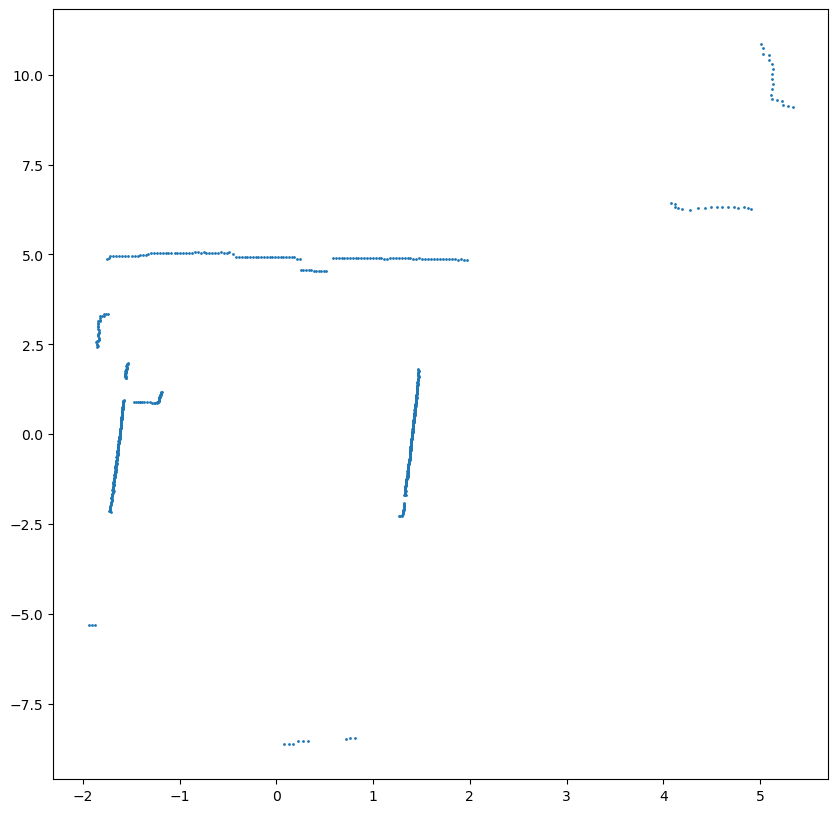

In [94]:
plt_idx = 0

plt.figure(figsize=(10, 10))
plt.scatter(all_data_df[plt_idx]['X'], all_data_df[plt_idx]['Y'], s=1)
plt.show()


In [95]:
# write to csv
addition = '_scan_data_organized'

# Save data
tmp_df = pd.DataFrame()

for i in range(len(all_data_df)):
    tmp_df = pd.concat([tmp_df, all_data_df[i]])
tmp_df = tmp_df
tmp_df.to_csv(file_path + file_name + addition + '.csv', index=False, header=True)

In [96]:
# # Load datapath and put into dataframe
# # path to csv data
# data_path = 'Data_Readers_Writers/Data/Hallway_Lidar_data_dinosars2_scan_data_organized.csv'
# tmp_df = pd.read_csv(data_path)

# #read and turn to list
# lowrange = 0
# highrange = 1070

# scan_df = []
# for i in range(int(tmp_df.shape[0]/1070)):
#     lowrange = lowrange + 1070 * i
#     highrange = highrange + 1070 * i
#     scan_df.append(tmp_df.iloc[lowrange:highrange, :])

# # Delete any column that has an inf in the rho spot
# for i in range(len(scan_df)):
#     inf_cols = scan_df[i]['Rho'][np.isfinite(scan_df[i]['Rho'])]
#     # print(inf_cols.index)
#     scan_df[i] = scan_df[i].T[inf_cols.index].T.reset_index(drop=True)
# scan_df[2]
